**Mortgage Calculation**

In [1]:
import pandas as pd
df_final = pd.read_csv("final.csv")
df_final['Interest'] = 0.075
df_final['Downpayment'] = 0.2
df_final['Loan_amount'] = df_final['Price'] * (1 - df_final['Downpayment'])
def calculate_mortgage(row):
    loan_amount = row['Loan_amount']
    monthly_interest_rate = row['Interest'] / 12
    loan_term = 30*12
    mortgage = loan_amount * (monthly_interest_rate * (1 + monthly_interest_rate) ** loan_term) / ((1 + monthly_interest_rate) ** loan_term - 1)
    return mortgage

df_final['Monthly_mortgage'] = df_final.apply(calculate_mortgage, axis=1)
df_final['Monthly_mortgage'] = df_final['Monthly_mortgage'] + df_final['HOA']
print(df_final)
df_final.to_csv("final.csv")

     Unnamed: 0      MLS_id      Price  Beds  Baths  Sqft  Year_built  \
0             0  ML81964272  2998888.0     4      3  2764        1986   
1             1  ML81964119   580000.0     2      2  1125        1986   
2             2  BE41057198  1588000.0     4      2  1797        1965   
3             3  BE41058557   699888.0     2      2  1040        1991   
4             4  ML81964175   799000.0     2      2   930        1987   
..          ...         ...        ...   ...    ...   ...         ...   
626         801  BE41049475   685000.0     2      2   947        2000   
627         802  CC41049309  4195000.0     5      6  5992        1975   
628         803  CC41049163   375000.0     1      1   758        1974   
629         804  BE41043078  7200000.0     3      2  2424        1930   
630         814  BE41010860  1500000.0     3      2  2800        1938   

               Property_type  HOA  No_of_days_onsite  \
0    Single Family Residence  420                  1   
1          

/Users/shrikirti/miniconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


**Data Visualization**

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

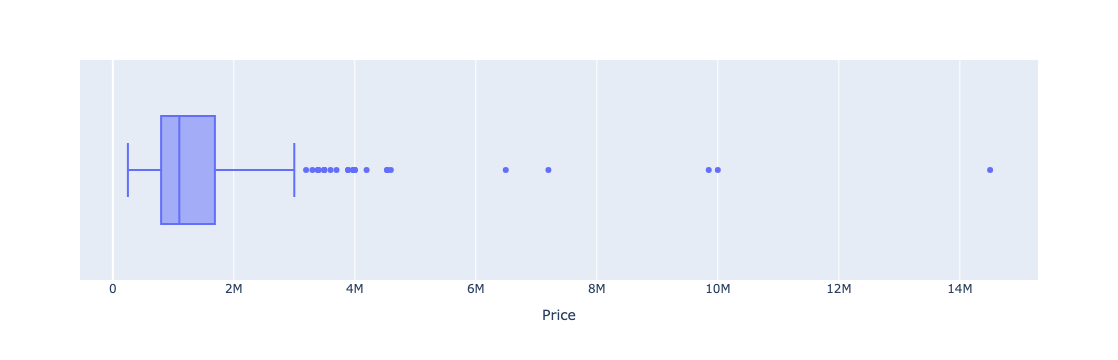

In [3]:
# Chart 1 Boxplot for Price of houses.
df_final = pd.read_csv("final.csv")
fig1= px.box(df_final, x= 'Price')
fig1.show()

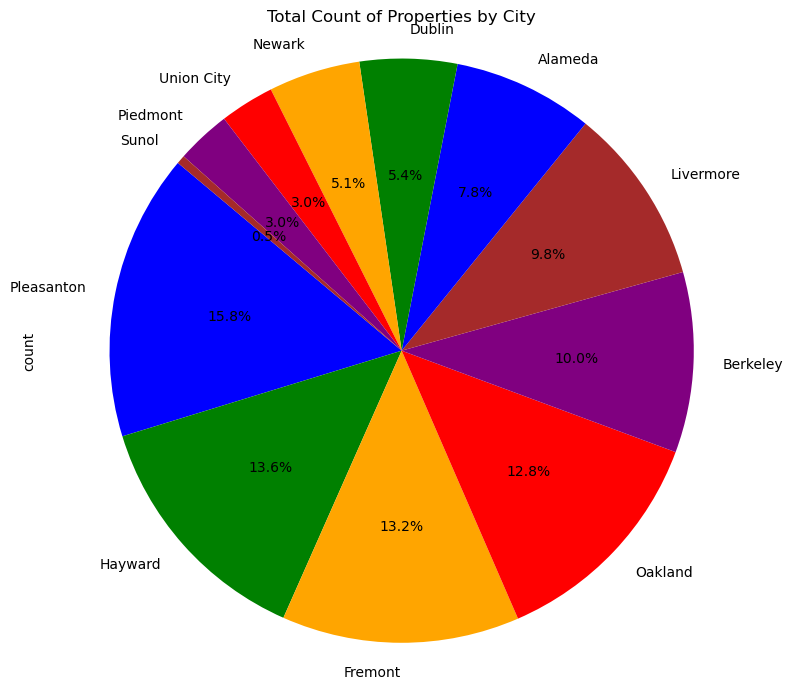

In [4]:
#Chart 2 No of homes by city
total_count_by_city = df_final['City'].value_counts()
plt.figure(figsize=(8, 7))
total_count_by_city.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['blue', 'green', 'orange', 'red', 'purple', 'brown'])
plt.title('Total Count of Properties by City')
plt.axis('equal')  
plt.tight_layout()
plt.show()

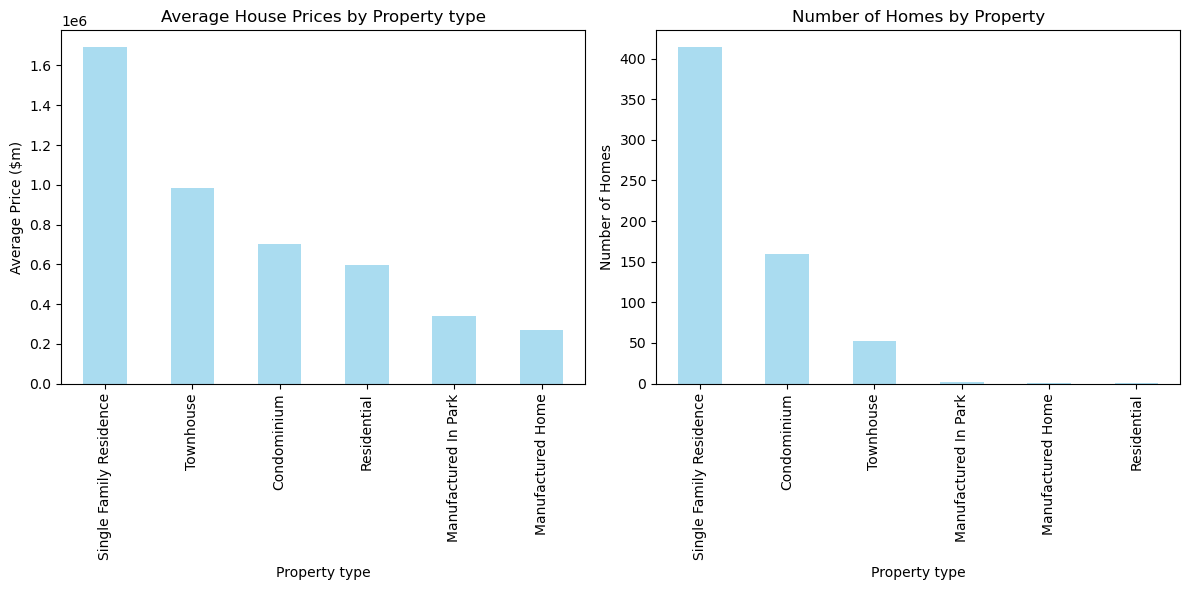

In [5]:
#Chart 3 Average house prices by property type
avg_price_by_propertytype = df_final.groupby('Property_type')['Price'].mean().sort_values(ascending=False)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12, 6])
avg_price_by_propertytype.plot(kind='bar', ax=ax1, color='skyblue', alpha=0.7)
ax1.set_xlabel('Property type')
ax1.set_ylabel('Average Price ($m)')
ax1.set_title('Average House Prices by Property type')
ax1.set_xticklabels(avg_price_by_propertytype.index, rotation=90, ha='center')
plt.tight_layout()
num_homes_by_propertype = df_final['Property_type'].value_counts().sort_values(ascending=False)
num_homes_by_propertype.plot(kind='bar', ax=ax2, color='skyblue', alpha=0.7)
ax2.set_xlabel('Property type')
ax2.set_ylabel('Number of Homes')
ax2.set_title('Number of Homes by Property')
ax2.set_xticklabels(num_homes_by_propertype.index, rotation=90, ha='center')
plt.tight_layout()
plt.show()

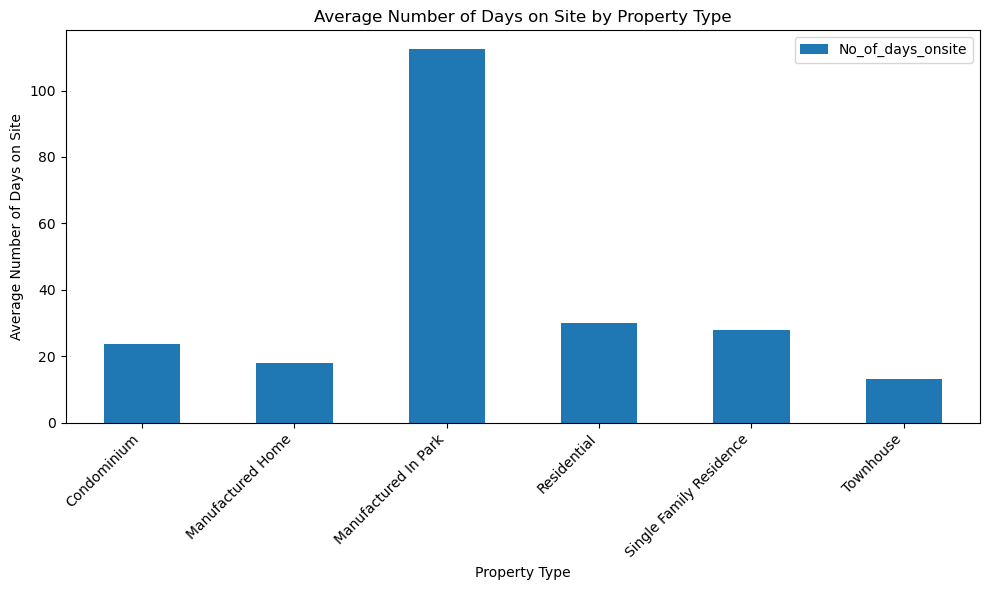

In [6]:
#Chart 5 for comparision of Avg no of days on site with property typ
avg_days_onsite_by_type = df_final.groupby('Property_type')['No_of_days_onsite'].mean().reset_index()
fig, ax = plt.subplots(figsize=(10, 6))
ax = avg_days_onsite_by_type.plot(kind='bar', x='Property_type', y='No_of_days_onsite', ax=ax)
ax.set_title('Average Number of Days on Site by Property Type')
ax.set_xlabel('Property Type')
ax.set_ylabel('Average Number of Days on Site')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

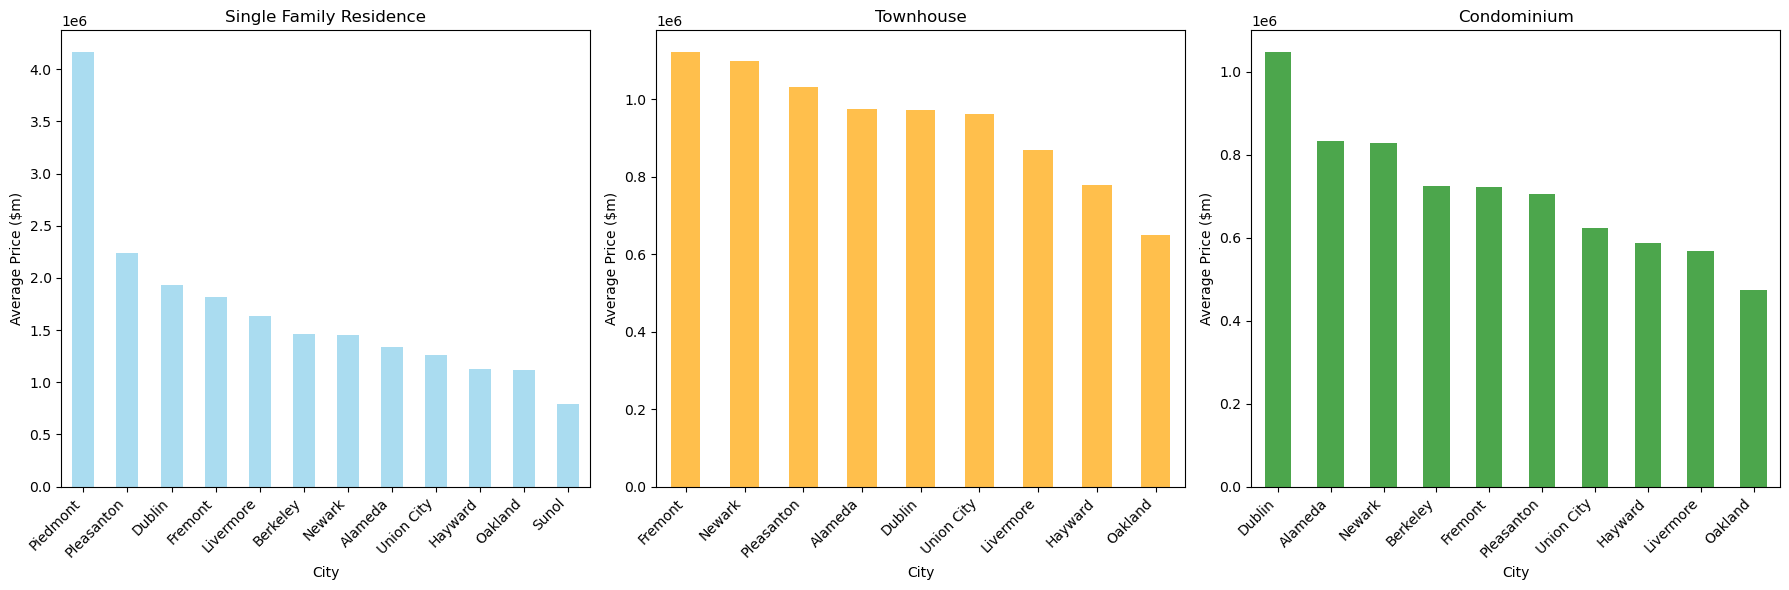

In [7]:
#Chart 5 Average price across cities (by property type)
fig, axes = plt.subplots(1,3, figsize=[18,6])

#Single Family house
sfr_df = df_final[df_final['Property_type'] == 'Single Family Residence']
avg_price_sfr = sfr_df.groupby('City')['Price'].mean().sort_values(ascending=False)
avg_price_sfr.plot(kind='bar', ax=axes[0], color='skyblue', alpha=0.7)
axes[0].set_title('Single Family Residence')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Average Price ($m)')
axes[0].set_xticklabels(avg_price_sfr.index, rotation=45, ha='right')

#Townhouse
townhouse_df = df_final[df_final['Property_type'] == 'Townhouse']
avg_price_townhouse = townhouse_df.groupby('City')['Price'].mean().sort_values(ascending=False)
avg_price_townhouse.plot(kind='bar', ax=axes[1], color='orange', alpha=0.7)
axes[1].set_title('Townhouse')
axes[1].set_xlabel('City')
axes[1].set_ylabel('Average Price ($m)')
axes[1].set_xticklabels(avg_price_townhouse.index, rotation=45, ha='right')

#Condominium 
condo_df = df_final[df_final['Property_type'] == 'Condominium']
avg_price_condo = condo_df.groupby('City')['Price'].mean().sort_values(ascending=False)
avg_price_condo.plot(kind='bar', ax=axes[2], color='green', alpha=0.7)
axes[2].set_title('Condominium')
axes[2].set_xlabel('City')
axes[2].set_ylabel('Average Price ($m)')
axes[2].set_xticklabels(avg_price_condo.index, rotation=45, ha='right')

plt.tight_layout()

plt.show()

/var/folders/98/lxdqjgt96lzdgnw6b5f9l_j80000gn/T/ipykernel_6894/1863206868.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




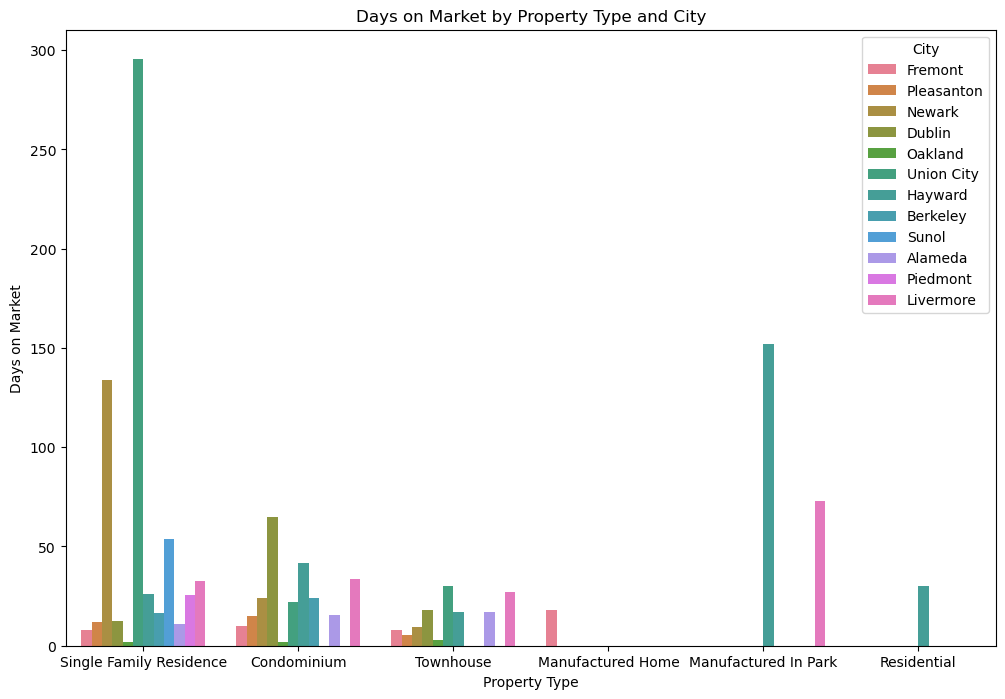

In [8]:
#Chart 6 Property Price distribution by City
plt.figure(figsize=(12, 8))

sns.barplot(x='Property_type', y='No_of_days_onsite', hue='City', data=df_final, ci=None)
plt.title('Days on Market by Property Type and City')
plt.xlabel('Property Type')
plt.ylabel('Days on Market')

plt.legend(title='City')
plt.show()

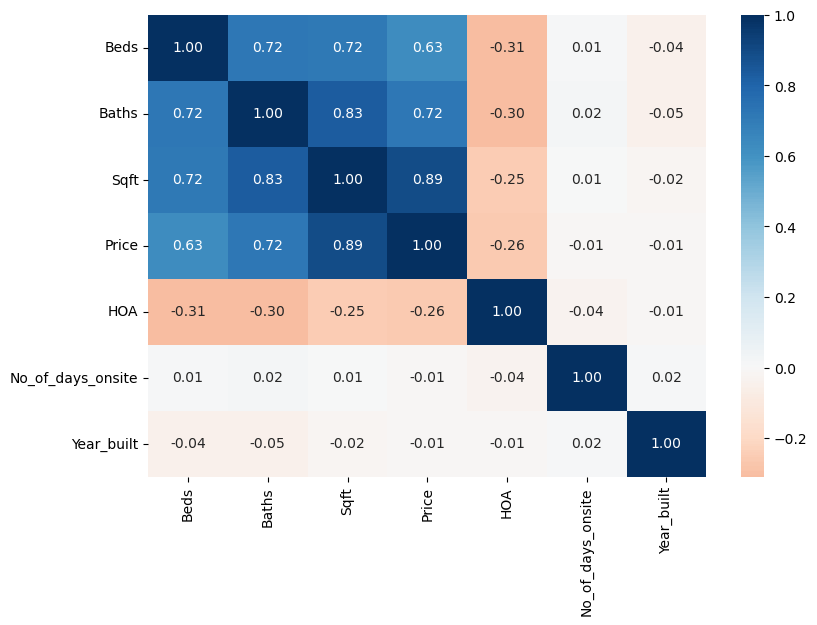

In [9]:
#Chart 7: Correlation matrix 
correl = df_final[['Beds', 'Baths', 'Sqft', 'Price', 'HOA', 'No_of_days_onsite', 'Year_built' ]].corr()
fig, ax = plt.subplots()
fig.set_size_inches(9, 6)
sns.heatmap(correl, annot=True, fmt=".2f", cmap="RdBu", center=0, ax=ax)

plt.show()

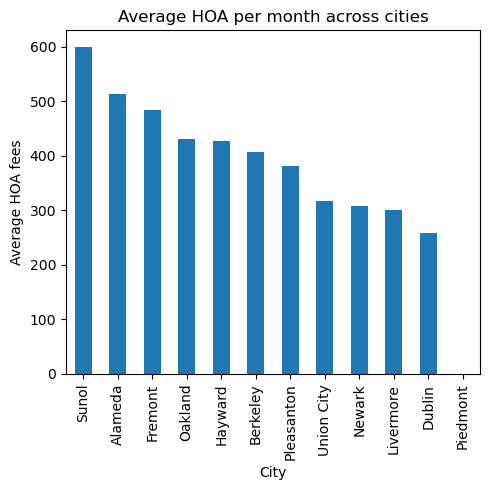

In [10]:
#Chart 8: Average HOA by City
df_final.groupby('City')['HOA'].mean().sort_values(ascending=False).plot(kind='bar', figsize=[5, 5])
plt.xlabel('City')
plt.ylabel('Average HOA fees')
plt.xticks(rotation=90)
plt.title('Average HOA per month across cities')

plt.tight_layout()
plt.show()

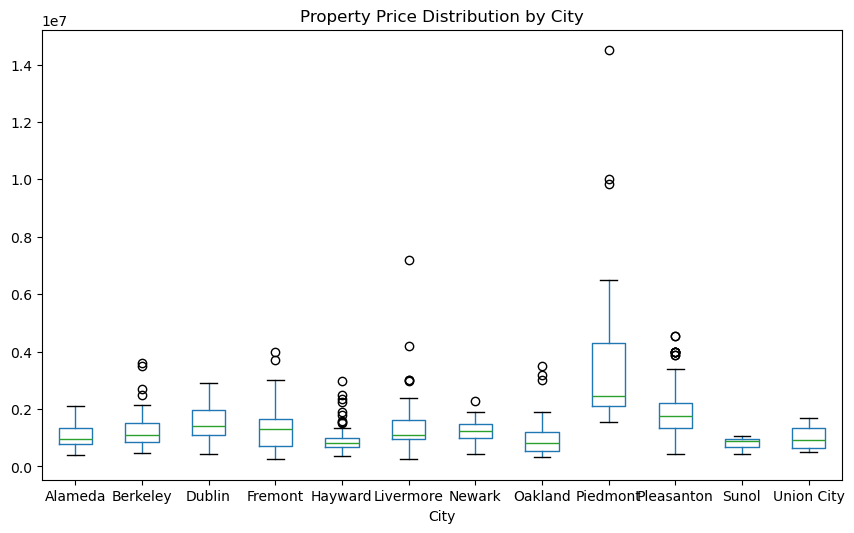

In [11]:
#Chart 9: Property price distribution by city
df_final.boxplot(column='Price', by='City', figsize=[10, 6], grid=False)
plt.title('Property Price Distribution by City')
plt.suptitle('')
plt.show()

/Users/shrikirti/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning:

23.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/Users/shrikirti/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning:

27.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



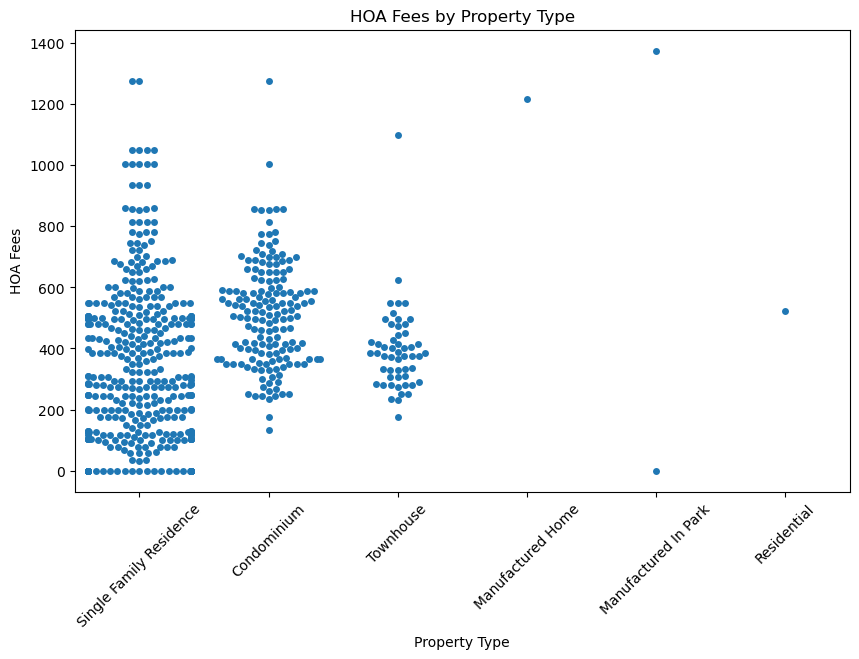

In [12]:
#Chart 10: Optional HOA properties by Type
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Property_type', y='HOA', data=df_final)
plt.title('HOA Fees by Property Type')
plt.xlabel('Property Type')
plt.ylabel('HOA Fees')
plt.xticks(rotation=45)
plt.show()

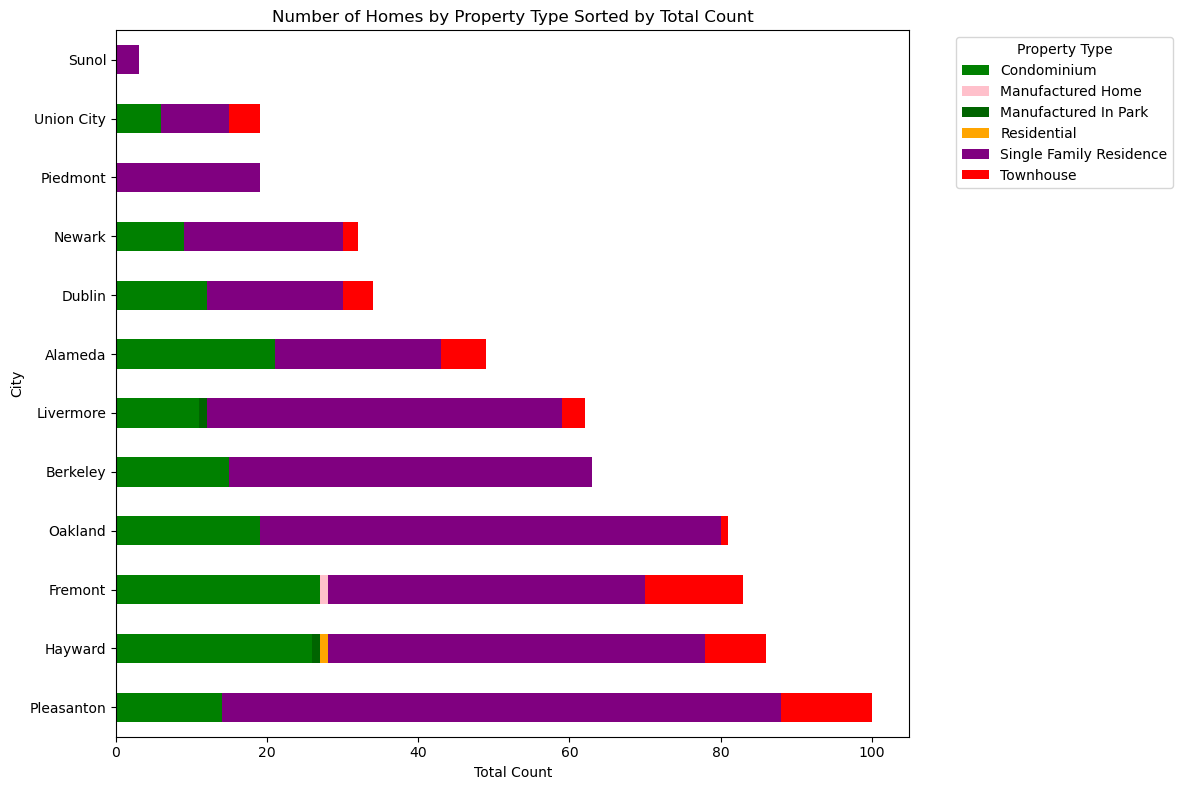

In [13]:
#Chart 11: Optional Number of home by property type by total count 
grouped_data = df_final.groupby(["City", "Property_type"]).size().unstack(fill_value=0)
city_totals = grouped_data.sum(axis=1)
grouped_data_sorted = grouped_data.loc[city_totals.sort_values(ascending=False).index]
property_type_colors = {
    "Condominium": "green",
    "Manufactured Home": "pink",
    "Manufactured In Park": "darkgreen",
    "Residential": "orange",
    "Single Family Residence": "purple",
    "Townhouse": 'red'
}
grouped_data_sorted.plot(kind="barh", stacked=True, color=[property_type_colors[col] for col in grouped_data_sorted.columns], figsize=(12, 8))
plt.title("Number of Homes by Property Type Sorted by Total Count")
plt.xlabel("Total Count")
plt.ylabel("City")
plt.legend(title="Property Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()  
plt.show()

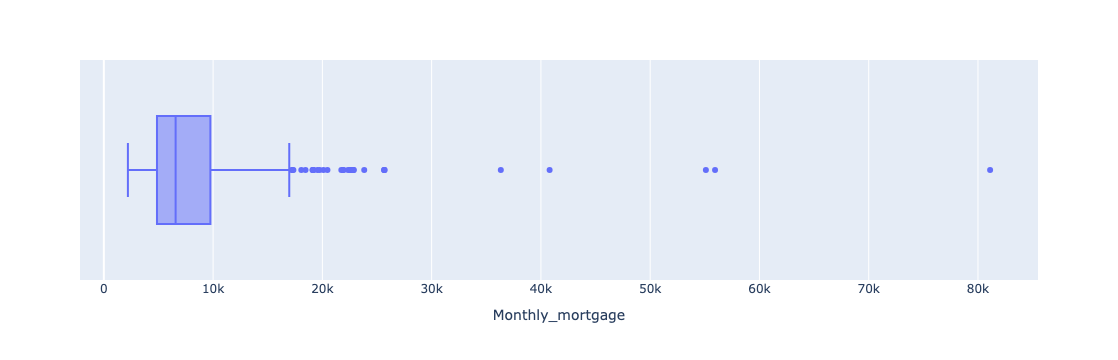

In [14]:
# Chart 12 Monthly mortgage - Boxplot
fig1= px.box(df_final, x= 'Monthly_mortgage')
fig1.show()

**Simple linear regression**

In [15]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Slope: 821.3375830376185
Intercept: -133822.45094305533


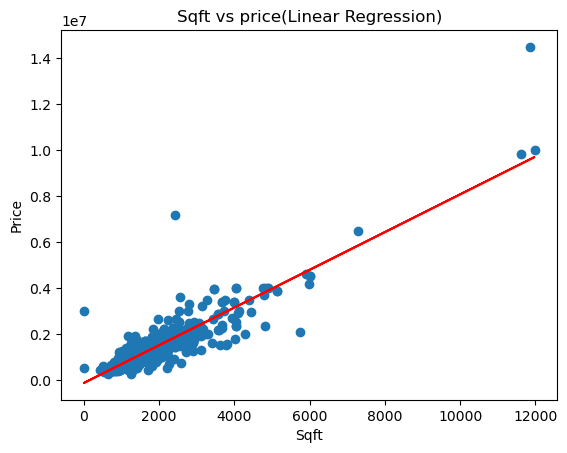

In [16]:
df_final = pd.read_csv("final.csv")
x = df_final['Sqft'].to_numpy()
y = df_final['Price'].to_numpy()
x_mean = np.mean(x)
y_mean = np.mean(y)
numerator = 0
denominator = 0
for i in range(len(x)):
    numerator += (x[i] - x_mean) * (y[i] - y_mean)
    denominator += (x[i] - x_mean) ** 2
slope = numerator / denominator
intercept = y_mean - slope * x_mean

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
y_predicted = slope * x + intercept
plt.scatter(x, y)
plt.plot(x, y_predicted, color='red')
plt.xlabel("Sqft")
plt.ylabel("Price")
plt.title("Sqft vs price(Linear Regression)")
plt.show()

**Price prediction**

In [17]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [18]:
df_final = pd.read_csv("final.csv")
df_final['Price_per_sqft'] = df_final['Price'] / df_final['Sqft']
Q1 = df_final[['Price', 'Beds', 'Baths', 'Sqft', 'HOA','Price_per_sqft']].quantile(0.25)
Q3 = df_final[['Price', 'Beds', 'Baths', 'Sqft', 'HOA','Price_per_sqft']].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df_final[
    (df_final['Price'] >= lower_bound['Price']) & (df_final['Price'] <= upper_bound['Price']) &
    (df_final['Beds'] >= lower_bound['Beds']) & (df_final['Beds'] <= upper_bound['Beds']) &
    (df_final['Baths'] >= lower_bound['Baths']) & (df_final['Baths'] <= upper_bound['Baths']) &
    (df_final['Sqft'] >= lower_bound['Sqft']) & (df_final['Sqft'] <= upper_bound['Sqft']) &
    (df_final['HOA'] >= lower_bound['HOA']) & (df_final['HOA'] <= upper_bound['HOA']) &
    (df_final['Price_per_sqft'] >= lower_bound['Price_per_sqft']) & (df_final['Price_per_sqft'] <= upper_bound['Price_per_sqft'])]

print(df_no_outliers)
numerical_columns = ['Beds', 'Baths', 'Sqft', 'HOA',]
X = df_no_outliers[numerical_columns]
y = df_no_outliers['Price_per_sqft']

min_max_scaler = MinMaxScaler()
X_min_max_scaled = min_max_scaler.fit_transform(X)

standard_scaler = StandardScaler()
X_standard_scaled = standard_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_min_max_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (Coefficient of Determination):", r2)

def format_currency(number):
    return '${:,.0f}'.format(number)

df_results = pd.DataFrame(data={'predictions': y_pred, 'actual': y_test})
df_results['predictions'] = df_results['predictions'].map(format_currency)
df_results['actual'] = df_results['actual'].map(format_currency)

print(df_results)

     Unnamed: 0.1  Unnamed: 0      MLS_id      Price  Beds  Baths  Sqft  \
0               0           0  ML81964272  2998888.0     4      3  2764   
1               1           1  ML81964119   580000.0     2      2  1125   
2               2           2  BE41057198  1588000.0     4      2  1797   
3               3           3  BE41058557   699888.0     2      2  1040   
4               4           4  ML81964175   799000.0     2      2   930   
..            ...         ...         ...        ...   ...    ...   ...   
623           623         796  ML81949570  1750000.0     4      3  2916   
625           625         800  BE41050752   699000.0     3      2  1242   
626           626         801  BE41049475   685000.0     2      2   947   
628           628         803  CC41049163   375000.0     1      1   758   
630           630         814  BE41010860  1500000.0     3      2  2800   

     Year_built            Property_type  HOA  No_of_days_onsite  \
0          1986  Single Family 